# Aula 5 - EDA - Tratamento de Dados

Nessa aula, iremos tratar dos seguintes conteúdos:
- Análise Exploratória dos Dados
- Redundância dos Dados
- Detecção de Outliers
- Informações Faltantes
- Preenchimento de Dados Faltantes

<img src="https://i0.wp.com/www.r-exercises.com/wp-content/uploads/2017/05/monitor.png?resize=275%2C140" width=600>

## 

## Análise Exploratória dos Dados (EDA)

 A Análise Exploratória dos Dados é o __principal processo no projeto de Data Science__, onde iremos __conhecer os dados__ e tirar __conclusões e hipóteses__ a partir de observações levantadas.<br>
 <br>
Mas vale lembrar também que devemos __avaliar a consistência dos dados__, pois se existirem qualquer tipo de problema com os dados e tirarmos conclusões e insights encima deles, assumiremos conclusões erroneamente. Dado isso vamos aprender algumas técnicas para lidarmos com os seguintes problemas com os dados:
- Redudância dos Dados (Dados Duplicados);
- Detecção de Outliers;
- Informações Faltantes.

## 

## Redundância dos Dados

Redundância dos Dados é qualquer tipo de repetição deles que não agregam informações adicionais para a análise exploratória dos dados. Vamos ver alguns exemplos de redundâncias de dados:

**Redundância em dados não-estruturados**

Muito comum pois dados binários e textuais possuem elementos que não auxiliam na análise, temos os seguintes exemplos:

- o fundo de imagens e documentos;

- timbre em documentos e cartas;

- tipos de palavras em textos: artigos, conjunções, etc.


**Redundância em dados estruturados**

Já para esse caso, as redundâncias estÂo diretamente relacionadas a:

- linhas com valores repetidos (duplicados);

- colunas com valores constantes (iguais para todas as instâncias);

- colunas com alta correlação.

Vamos nessa aula focar no processo de tratar de dados estruturados (posteriormente iremos falar mais a respeito de dados não estruturados na aula de NLP). Vamos utilizar de uma base de dados _people_prof_relig.csv_:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('people_prof_relig.csv')

In [3]:
df.head()

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary
0,Eugenio Ewell,M,1968,USA,Christian,New Orleans,Nurse,53,21,4140
1,Ivo Izidro,M,1988,Mexico,Christian,Acapulco,Nurse,33,2,2709
2,Lindsey Lever,M,1965,USA,Christian,New Orleans,Nurse,56,37,7896
3,Desiree Dardar,F,1995,USA,Christian,New Orleans,Nurse,26,1,2580
4,Mariann Mulero,F,1973,USA,Christian,New Orleans,Nurse,48,16,3668


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              100 non-null    object
 1   Sex               100 non-null    object
 2   Year of Birth     100 non-null    int64 
 3   Country of Birth  100 non-null    object
 4   Religion          100 non-null    object
 5   City              100 non-null    object
 6   Profession        100 non-null    object
 7   Age               100 non-null    int64 
 8   Experience        100 non-null    int64 
 9   Salary            100 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 7.9+ KB


## 

### Dados duplicados ou constantes

Bases de dados que contém informações repetidas ou atributos irrelevantes para obter as respostas que se espera da análise.

A redundância pode atrapalhar no projeto de modelos de aprendizado e estatísticos pois a quantidade de exemplos pode influenciar no viés do modelo.

#### Redundância em bases de dados estruturadas:

* Registros duplicados

* Atributos com valores iguais em todas as observacoes


Vamos carregar uma base de dados para mostrar exemplos

In [5]:
df.head()

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary
0,Eugenio Ewell,M,1968,USA,Christian,New Orleans,Nurse,53,21,4140
1,Ivo Izidro,M,1988,Mexico,Christian,Acapulco,Nurse,33,2,2709
2,Lindsey Lever,M,1965,USA,Christian,New Orleans,Nurse,56,37,7896
3,Desiree Dardar,F,1995,USA,Christian,New Orleans,Nurse,26,1,2580
4,Mariann Mulero,F,1973,USA,Christian,New Orleans,Nurse,48,16,3668


#### Linhas/registros duplicados

O tipo mais comum de dados redundantes são as linhas ou registros duplicados, ou seja, aquelas que possuem todos os valores de atributos iguais.

In [6]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [7]:
df[df.duplicated()]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary
33,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141
51,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300
61,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141
68,Ricardo Rima,M,1977,Peru,Christian,Arequipa,Nurse,44,16,6677


A consulta acima mostra apenas as linhas __extras__, ou seja, as duplicadas encontradas após a ocorrência da primeira linha original.

Assim, ao consultar por um dos nomes que temos acima duplicados, veremos que há duas linhas para ele, sendo a duplicada considerada a linha 51.

In [8]:
df[df['Name'] == 'Carlos Cobre']

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary
13,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300
51,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300


Podemos usar a opção `keep` para manter todas as duplicatas, mostrando seus valores

In [9]:
df[df.duplicated(keep = False)]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary
13,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300
18,Ricardo Rima,M,1977,Peru,Christian,Arequipa,Nurse,44,16,6677
19,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141
33,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141
51,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300
61,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141
68,Ricardo Rima,M,1977,Peru,Christian,Arequipa,Nurse,44,16,6677


Felizmente, temos uma funcão pronta para remover duplicatas de dataframes, `drop_duplicates()`, na qual podemos manter a primeira ocorrência da linha duplicada: `first`, a última: `last`, ou remover todas as que aparecem duplicadas: `False`.

In [10]:
df_ndup = df.drop_duplicates(keep = 'first')

In [11]:
df_ndup[df_ndup['Name'] == 'Carlos Cobre']

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary
13,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300


In [12]:
df_ndup[df_ndup.duplicated(keep = False)]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary


#### Duplicidade em atributos

A duplicidade pode gerar problemas quando aparece isolada em determinado atributo. Nessa base de dados um atributo que pode ser sensível a isso é o nome:

In [13]:
df_ndup[df_ndup.duplicated(['Name'], keep = False)]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary
19,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141
93,Apolonia Abler,F,1967,Australia,Christian,Brisbane,Nurse,54,23,5496


Notamos que, apesar de ter o mesmo nome, sexo e ano de nascimento, as duas pessoas nasceram em países diferentes e portanto não há redundância ou dados duplicados a remover.

#### Atributos constantes

Investigando os atributos Profession e Religion, mostrando seus histogramas, notamos que todas as linhas tem o mesmo valor para esses atributos.

Apesar do valor informativo, ao construir modelos computacionais, por exemplo classificadores, esses atributos representam um aumento na dimensionalidade sem contribuir para a tarefa principal, classificação.

Podemos usar o método `nunique()` para obter a contagem de valores distintos

In [14]:
att_const = np.array(df_ndup.columns[df_ndup.nunique() <= 1])

In [15]:
print(att_const)

['Religion' 'Profession']


In [16]:
df_ndup['Religion'].unique()

array(['Christian'], dtype=object)

In [17]:
df_ndup['Profession'].unique()

array(['Nurse'], dtype=object)

In [18]:
df_nred = df_ndup.drop(att_const, axis = 1)

In [19]:
df_nred.head()

,Name,Sex,Year of Birth,Country of Birth,City,Age,Experience,Salary
0,Eugenio Ewell,M,1968,USA,New Orleans,53,21,4140
1,Ivo Izidro,M,1988,Mexico,Acapulco,33,2,2709
2,Lindsey Lever,M,1965,USA,New Orleans,56,37,7896
3,Desiree Dardar,F,1995,USA,New Orleans,26,1,2580
4,Mariann Mulero,F,1973,USA,New Orleans,48,16,3668


## 

### Atributos correlacionados

Alguns atributos podem estar altamente correlacionados com outros. Esses atributos oferecem pouca contribuição no sentido de melhorar o que sabemos sobre o conjunto de dados.

Ainda, quando se trata de treinar modelos podemos incorrer em maior custo computacional ou problemas de convergência.

Uma ferramenta interessante para entender *dependências lineares* entre atributos é a correlação.

No entanto, a correlação só é computada com valores numéricos.

In [20]:
corr = df_nred.corr()

corr

,Year of Birth,Age,Experience,Salary
Year of Birth,1.000000,-1.000000,-0.908208,-0.362197
Age,-1.000000,1.000000,0.908208,0.362197
Experience,-0.908208,0.908208,1.000000,0.432904
Salary,-0.362197,0.362197,0.432904,1.000000


Características da matriz de correlação:
- valores negativos indicam correlação inversa
- tem diagonal igual a 1 (auto-correlação)
- é simétrica

Vamos considerar como alta correlação atributos com valores iguais ou superiores a 0.95

Para facilitar:
- pegamos o valor absoluto da correlação,
- consideramos apenas a matriz triangular superior - devido a simetria, e
- não incluimos a diagonal principal (para a qual todos os valores são 1)

In [21]:
abs_corr = np.abs(corr)
abs_corr

,Year of Birth,Age,Experience,Salary
Year of Birth,1.000000,1.000000,0.908208,0.362197
Age,1.000000,1.000000,0.908208,0.362197
Experience,0.908208,0.908208,1.000000,0.432904
Salary,0.362197,0.362197,0.432904,1.000000


In [22]:
# Criando uma mascara para puxar so as correlações distintas
# k =1 indica para não incluir a diagonal principal
mask_tri = np.triu(np.ones(corr.shape), k = 1).astype(np.bool)

C:\Users\ITX Gamer\AppData\Local\Temp\ipykernel_18024\3760206448.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_tri = np.triu(np.ones(corr.shape), k = 1).astype(np.bool)


In [23]:
print(mask_tri)

[[False  True  True  True]
 [False False  True  True]
 [False False False  True]
 [False False False False]]


Para cada coluna das colunas da matriz triangular nas quais qualquer valor seja maior ou igual a 0.95

In [24]:
tri_sup = abs_corr.where(mask_tri)
print(tri_sup)

               Year of Birth  Age  Experience    Salary
Year of Birth            NaN  1.0    0.908208  0.362197
Age                      NaN  NaN    0.908208  0.362197
Experience               NaN  NaN         NaN  0.432904
Salary                   NaN  NaN         NaN       NaN


In [25]:
att_altacorr = [col for col in tri_sup.columns if any(tri_sup[col] >= 0.70)]

In [26]:
att_altacorr

['Age', 'Experience']

In [27]:
df_clean = df_nred.drop(att_altacorr, axis = 1)

In [28]:
df_clean.head()

,Name,Sex,Year of Birth,Country of Birth,City,Salary
0,Eugenio Ewell,M,1968,USA,New Orleans,4140
1,Ivo Izidro,M,1988,Mexico,Acapulco,2709
2,Lindsey Lever,M,1965,USA,New Orleans,7896
3,Desiree Dardar,F,1995,USA,New Orleans,2580
4,Mariann Mulero,F,1973,USA,New Orleans,3668


## 

## Detecção de Outliers

**Relembrando - outliers, pontos "fora-da-curva" ou pontos aberrantes** : exemplos ou instâncias que, dentre do espaço de possíveis valores, recaem num intervalo *fora* daquele relativo a maior parte dos exemplos de uma base de dados.

Detectar outliers por meio de análise exploratória é útil para entender o comportamento da base de dados.

Existem também métodos **estatísticos** e de **aprendizado de máquina** que auxiliam nesse processo e que podem facilitar essa análise, detectando *outliers* de forma automática.

1. Dispersão: desvio padrão e intervalo interquartil
2. Distribuição: Normal univaridada
3. Agrupamento

In [29]:
house_rent = pd.read_csv('houses_to_rent_v2.csv')

In [30]:
house_rent.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [34]:
house_rent.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [33]:
house_rent.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

###  Desvio padrão e amplitude inter-quartil (por dispersão)

Para cada atributo, podemos estudar como os valores estão relacionados com a dispersão dos dados.

Entre as medidas de dispersão temos:
* desvio padrão amostral (*standard deviation*)
    Seja $\mu$ a média de uma variável,
    $$\sigma = \frac{\sqrt{ \sum_i (x_i - \mu)^2}}{n-1}$$


* amplitude - ou intervalo - interquartil (IQR, *interquartile range*)
    Sejam:
    - $Q_{1}$ o valor relativo aos primeiros 25% dados,
    - $Q_{2}$ o valor relativo aos primeiros 50% dados (mediana),
    - $Q_{3}$ o valor relativo aos primeiros 75% dos dados,
    
    $$IQR = Q_{3} - Q_{1}$$

In [35]:
house_rent.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [36]:
# Calculando Q1 e Q3
Q1 = house_rent['area'].quantile(0.25)
print(Q1)

56.0


In [37]:
Q3 = house_rent['area'].quantile(0.75)
print(Q3)

182.0


In [38]:
# Calculando o IQR
IQR = Q3 - Q1
print(IQR)

126.0


In [39]:
# Limite Superior
lim_sup = Q3 + 1.5*IQR
print(lim_sup)

371.0


In [40]:
# Limite Inferior
lim_inf = Q1 - 1.5*IQR
print(lim_inf)

-133.0


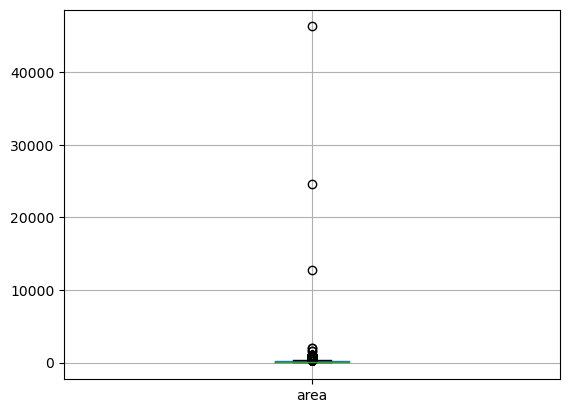

In [41]:
house_rent.boxplot(['area'])
plt.show()

In [42]:
df_iqr = house_rent[house_rent['area'] <= lim_sup]

In [43]:
df_iqr.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10020.000000,10020.000000,10020.000000,10020.000000,1.002000e+04,10020.000000,10020.000000,10020.000000,1.002000e+04
mean,116.064770,2.387525,2.064571,1.430140,1.150773e+03,3514.389920,299.498403,47.453293,5.012321e+03
std,82.894232,1.073236,1.223062,1.378332,1.609440e+04,2988.684356,3175.356056,40.532033,1.685653e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,55.000000,2.000000,1.000000,0.000000,2.300000e+02,1500.000000,34.000000,20.000000,1.997000e+03
50%,85.000000,2.000000,2.000000,1.000000,5.710000e+02,2500.000000,112.000000,33.000000,3.349000e+03
75%,160.000000,3.000000,3.000000,2.000000,1.200000e+03,4446.250000,317.000000,59.000000,6.017250e+03
max,370.000000,10.000000,9.000000,10.000000,1.117000e+06,30000.000000,313700.000000,451.000000,1.120000e+06


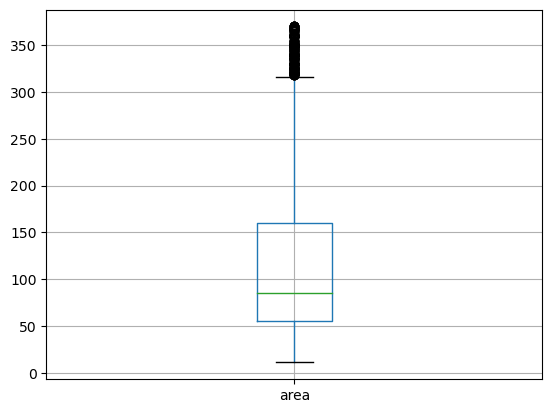

In [44]:
df_iqr.boxplot(['area'])
plt.show()

In [45]:
df_outliers = house_rent[house_rent['area'] > lim_sup]

In [46]:
df_outliers.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
19,São Paulo,600,4,5,6,-,acept,not furnished,0,12000,9500,181,21680
86,São Paulo,600,4,4,4,9,acept,not furnished,7400,8500,3368,108,19380
105,Belo Horizonte,400,4,2,2,-,not acept,not furnished,0,2500,74,41,2615
131,São Paulo,900,4,6,8,-,acept,not furnished,0,15000,4417,226,19640


In [47]:
df_outliers.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.00000,672.000000
mean,643.555060,4.273810,4.805060,4.278274,1520.675595,9590.011905,1368.793155,140.49256,12620.278274
std,2056.965563,1.148847,1.471773,2.067765,2407.971296,4134.715526,1504.995319,60.83691,5721.085150
min,372.000000,1.000000,1.000000,0.000000,0.000000,1000.000000,0.000000,15.00000,1410.000000
25%,400.000000,4.000000,4.000000,3.000000,0.000000,6500.000000,459.000000,98.00000,8494.000000
50%,465.000000,4.000000,5.000000,4.000000,0.000000,9025.000000,1000.000000,136.00000,12090.000000
75%,580.000000,5.000000,6.000000,6.000000,2925.000000,12762.500000,1838.000000,188.00000,16055.000000
max,46335.000000,13.000000,10.000000,12.000000,15000.000000,45000.000000,21880.000000,677.00000,54430.000000


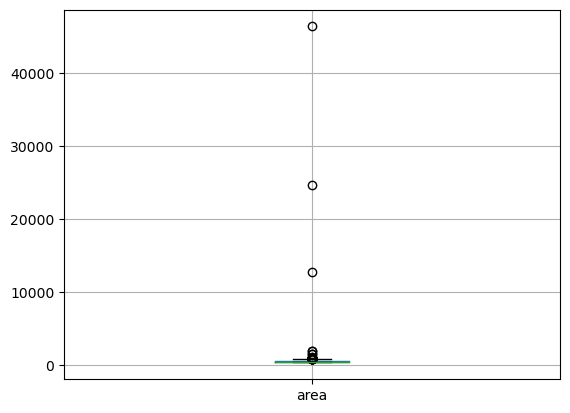

In [48]:
df_outliers.boxplot(['area'])
plt.show()

In [49]:
df_outliers[df_outliers['area'] > 10000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417


Vamos escrever uma função para remoção de outliers segundo o IQR:

In [50]:
def remove_outliers(data, features, factor = 1.5):
    # Fazer uma copia do conjunto de dados
    datac = data.copy()
    
    for col in features:
        # Verifica se a variavel é numerica
        if np.issubdtype(datac[col].dtype, np.number):
            # Calculando Q1, Q3 e IQR
            Q1 = datac[col].quantile(0.25)
            Q3 = datac[col].quantile(0.75)
            IQR = Q3 - Q1
            
            # Filtrando os outliers
            datac = datac.loc[(datac[col] >= Q1 - (IQR*factor)) & (datac[col] <= Q3 + (IQR*factor))]
            
    return datac

In [51]:
datac = remove_outliers(house_rent, house_rent.columns)

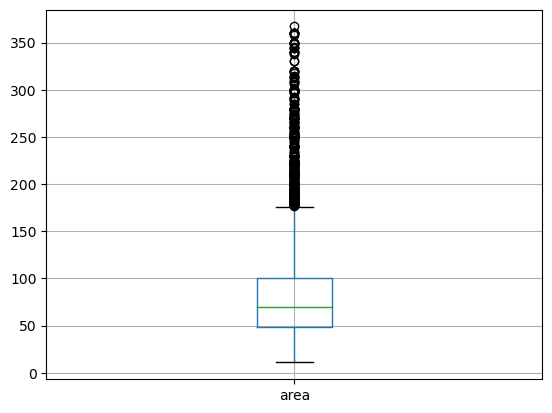

In [52]:
datac.boxplot(['area'])
plt.show()

## 

## Dados Faltantes

Problemas com dados do tipo: faltantes (e errôneas as quais também ocasionam perdas) podem levar a impactos nos modelos estatísticos e de aprendizado.

A primeira etapa é **detectar corretamente** as informações faltantes, em quais atributos ocorrem, separando em:
- Dados faltantes: no Python `NaN`, sendo indefinidos ou não encontrados
- Dados errôneos: valores que devem ser removidos para não prejudicar a análise. Comumente não são *outliers* mas dados corrompidos no armazenamento, transmissão ou inputação.

A seguir, temos como opções
- Remover as linhas/instâncias contendo valores faltantes
- Preencher valores faltantes utilizando algum método

In [63]:
house_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [64]:
# Contagem de NaNs por coluna
house_rent.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [65]:
house_rent.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [66]:
house_rent['floor'].value_counts()

-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
35        1
46        1
301       1
51        1
Name: floor, dtype: int64

In [67]:
house_rent['floor'] = pd.to_numeric(house_rent['floor'], 
                                    errors = 'coerce',
                                    downcast = 'integer')

In [68]:
house_rent.isna().sum()

city                      0
area                      0
rooms                     0
bathroom                  0
parking spaces            0
floor                  2461
animal                    0
furniture                 0
hoa (R$)                  0
rent amount (R$)          0
property tax (R$)         0
fire insurance (R$)       0
total (R$)                0
dtype: int64

In [69]:
house_rent.fillna(0, inplace = True)

In [70]:
house_rent.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [71]:
house_rent['floor'].value_counts()

0.0      2461
1.0      1081
2.0       985
3.0       931
4.0       748
5.0       600
6.0       539
7.0       497
8.0       490
9.0       369
10.0      357
11.0      303
12.0      257
13.0      200
14.0      170
15.0      147
16.0      109
17.0       96
18.0       75
19.0       53
20.0       44
21.0       42
25.0       25
23.0       25
22.0       24
26.0       20
24.0       19
27.0        8
28.0        6
29.0        5
32.0        2
35.0        1
46.0        1
301.0       1
51.0        1
Name: floor, dtype: int64

## 

In [ ]:
# Alterando os settings do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 

##  Preenchimento de Dados Faltantes

No experimento anterior lidamos com dados faltantes **removendo linhas**,

Agora vamos carregar novamente os dados e para **preencher os dados**, mantendo o tratamento de remoção de duplicatas, dos atributos string e de remoção de outliers

Há várias formas de se preencher dados faltantes:
- **com zeros**:
    para manter a instância e permitir o uso dos outros atributos (utilizando a função _fillna_)
<br>    

-  **pela média / mediana / moda**: similar ao anterior, mas aqui preenchemos com alguma métrica do atributo para os valores observados
<br>    

## 

## Exercícios

Faça a Análise Exploratória dos Dados para o _dataset_ sobre casos de COVID no México. Atente-se a avaliar a consistência dos dados, dados duplicados e faltantes, além de _outliers!_

In [61]:
covid = pd.read_csv('COVID.csv', index_col = 0)

In [62]:
covid.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0


In [73]:
covid.shape

(499692, 19)

In [72]:
covid.isna().sum()

sex                         0
patient_type                0
intubed                392268
pneumonia                  11
age                         0
pregnancy              254434
diabetes                 1641
copd                     1446
asthma                   1442
inmsupr                  1662
hypertension             1489
other_disease            2193
cardiovascular           1509
obesity                  1470
renal_chronic            1476
tobacco                  1579
contact_other_covid    153675
covid_res                   0
icu                    392269
dtype: int64

## Links, Artigos e Referências:

- [7 Must know Data Wrangling operations with Python Pandas](https://towardsdatascience.com/7-must-know-data-wrangling-operations-with-python-pandas-849438a90d15), artigo publicado pelo Towards Data Science;
- [Data Wrangling in Pandas](https://towardsdatascience.com/data-wrangling-in-pandas-a-downloadable-cheatsheet-84326d255a7b), artigo publicado pelo Towards Data Science;
- [A Checklist for Data Wrangling](https://towardsdatascience.com/a-checklist-for-data-wrangling-8f106c093fef), artigo publicado pelo Towards Data Science;
- [The ultimate Guide to Data Cleaning](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4), artigo publicado pelo Towards Data Science.